In [1]:
import os
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
imdb_dir = '/home/dave/Downloads/aclImdb'

In [4]:
def generate_data(folder_name):
    folder_dir = os.path.join(imdb_dir, folder_name)
    labels = []
    texts = []
    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(folder_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    labels = np.asarray(labels)

    return sequences, labels

In [5]:
x_train, y_train = generate_data("train")
x_test, y_test = generate_data("test")

In [6]:
# reverse the text sequence

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [8]:
print(x_train.shape)

(25000, 500)


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [10]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 94s 5ms/sample - loss: 0.5188 - acc: 0.7498 - val_loss: 0.5076 - val_acc: 0.8400
Epoch 2/10
20000/20000 [==============================] - 100s 5ms/sample - loss: 0.3161 - acc: 0.8749 - val_loss: 0.1686 - val_acc: 0.9652
Epoch 3/10
20000/20000 [==============================] - 104s 5ms/sample - loss: 0.2492 - acc: 0.9075 - val_loss: 0.1928 - val_acc: 0.9384
Epoch 4/10
20000/20000 [==============================] - 108s 5ms/sample - loss: 0.2151 - acc: 0.9212 - val_loss: 0.2382 - val_acc: 0.9108
Epoch 5/10
20000/20000 [==============================] - 97s 5ms/sample - loss: 0.1852 - acc: 0.9363 - val_loss: 0.5852 - val_acc: 0.8284
Epoch 6/10
20000/20000 [==============================] - 95s 5ms/sample - loss: 0.1723 - acc: 0.9391 - val_loss: 0.6205 - val_acc: 0.7818
Epoch 7/10
20000/20000 [==============================] - 96s 5ms/sample - loss: 0.1413 - acc: 0.9515 - val_loss: 

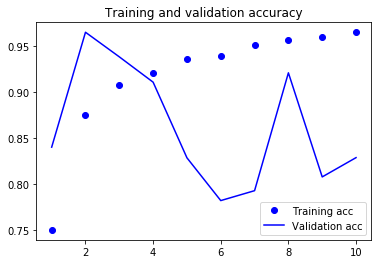

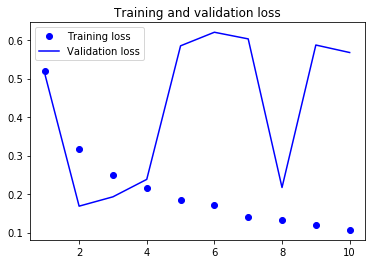

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
# Using the Bidirectional layer
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 92s 5ms/sample - loss: 0.5771 - acc: 0.7042 - val_loss: 0.4994 - val_acc: 0.9386
Epoch 2/10
20000/20000 [==============================] - 91s 5ms/sample - loss: 0.3932 - acc: 0.8436 - val_loss: 0.9172 - val_acc: 0.6298
Epoch 3/10
20000/20000 [==============================] - 92s 5ms/sample - loss: 0.2959 - acc: 0.8871 - val_loss: 0.4065 - val_acc: 0.8666
Epoch 4/10
20000/20000 [==============================] - 93s 5ms/sample - loss: 0.2466 - acc: 0.9081 - val_loss: 0.6565 - val_acc: 0.7610
Epoch 5/10
20000/20000 [==============================] - 94s 5ms/sample - loss: 0.2217 - acc: 0.9197 - val_loss: 0.4864 - val_acc: 0.8534
Epoch 6/10
20000/20000 [==============================] - 95s 5ms/sample - loss: 0.1912 - acc: 0.9334 - val_loss: 0.3373 - val_acc: 0.8706
Epoch 7/10
20000/20000 [==============================] - 99s 5ms/sample - loss: 0.1705 - acc: 0.9422 - val_loss: 0.1

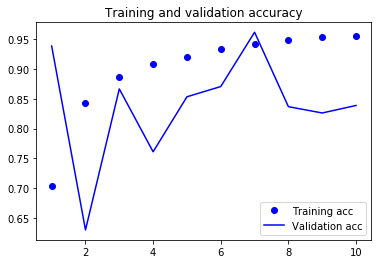

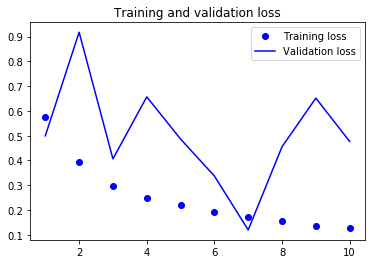

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()